<a href="https://colab.research.google.com/github/pravallika2580/Stroke_Prediction/blob/main/Prediction_of_Stroke_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset Description: Healthcare Stroke Data**
The dataset contains medical and demographic information for 5,110 patients, aimed at identifying factors related to the occurrence of strokes. The dataset consists of 12 columns, each representing a feature or characteristic related to the patient’s health or lifestyle.

**Dataset:**
1.   **id:** Unique identifier for each patient (integer).
2.   **gender:** Gender of the patient (categorical: Male, Female).
1.   **age:** Age of the patient (numeric).
2.   **hypertension:** Whether the patient has hypertension (binary: 0 for no, 1 for yes).
1.   **heart_disease:** Whether the patient has heart disease (binary: 0 for no, 1 for yes).
2.   **ever_married:** Marital status of the patient (categorical: Yes, No).
1.   **work_type:** Type of employment (categorical: Private, Self-employed, etc.).
2.   **Residence_type:** Urban or rural residence (categorical: Urban, Rural).
1.   **avg_glucose_level:** Average glucose level in the blood (numeric).
2.   **bmi:** Body Mass Index (BMI) of the patient (numeric; some missing values).
1.   **smoking_status:** Smoking habits (categorical: formerly smoked, never smoked, smokes).
2.   **stroke:** Whether the patient has had a stroke (binary: 0 for no, 1 for yes).


There are 4 columns with numeric data (age, avg_glucose_level, bmi, id) and several categorical or binary columns (e.g., gender, smoking_status). Additionally, the BMI column has some missing values.

This dataset can be used for predictive modeling to assess the likelihood of stroke occurrence based on various health and lifestyle factors.

#**(1) Defining The Problem Statement**

---

**Building a Linear Regression Model to Classify Patient's data to predict possibility of Stroke**

The goal of this project is to build a predictive model using Regression to classify patient data and predict the possibility of a stroke. Given a dataset with features such as age, hypertension status, heart disease, glucose levels, BMI, and lifestyle habits, the model should be able to estimate the likelihood of a patient having a stroke. This will help in identifying high-risk patients and potentially take preventive measures.

#**(2) Importing libraries**



---



In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as ex
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score




---



#**(3) Data loading and Preprocessing**

In [104]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [105]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1




> The head() function is used to print the first 5 rows of each dataset to give an overview of the data structure.



In [106]:
#To get the total number of rows in the DataFrame,
len(data)

5110



> There are 5110 rows in the dataset



In [107]:
# Check the basic structure and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [108]:
#Get summary statistics for numerical columns
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [109]:
#Generate summary statistics for object (categorical) columns
data.describe(include=object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [110]:
data.shape

(5110, 12)


>The shape attribute shows the number of rows and columns in the train dataset, which helps to understand the dataset size.

In [111]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [112]:
# Check for unique values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Unique values in '{col}': {data[col].unique()}")


Unique values in 'gender': ['Male' 'Female' 'Other']
Unique values in 'ever_married': ['Yes' 'No']
Unique values in 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values in 'Residence_type': ['Urban' 'Rural']
Unique values in 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']




---



#**(4) Missing Values**




In [113]:
print('Missing values in dataset are: ')
data.isnull().sum()

Missing values in dataset are: 


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201




> There are missing values only in the bmi column i.e 201



In [114]:
# Calculate the percentage of missing values for each column
missing_percentage = data.isnull().sum() / len(data)*100
# Display the missing percentage
print(missing_percentage)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64




> Percentage of missing values in bmi is 3.9333464



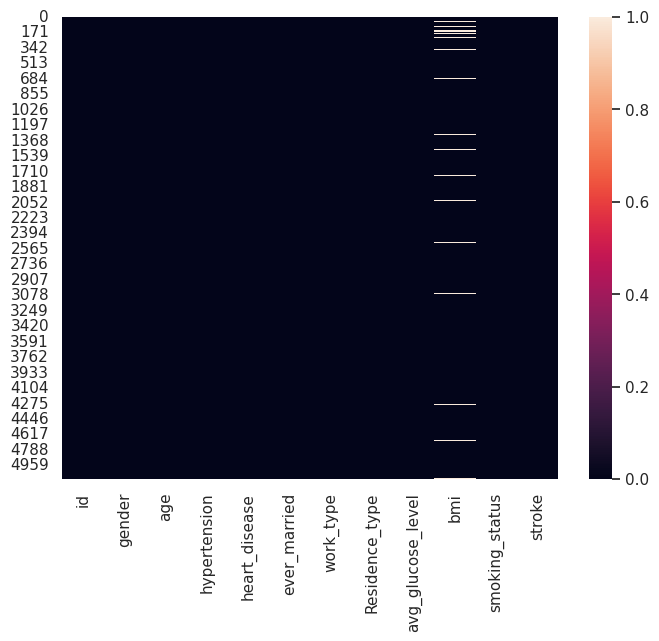

In [115]:
#visualizing missing values
sns.heatmap(data.isnull())
plt.show()



> We can see that there are several rows with missing values of bmi. These are represented by the white rows in the heatmap.



In [116]:
#Handling the missing values in the bmi by mean
data['bmi'].fillna(data['bmi'].mean(), inplace=True)
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0




> We can see that missing values in bmi are handled



---





# **Questions**

**Question 1:**
Which age group in this dataset has a higher likelihood of experiencing a stroke?

Options:

A. 0-20 years

B. 20-40 years

C. 40-60 years

D. 60 years and above

Answer: D. 60 years and above

Explanation: The risk of stroke generally increases with age. Older individuals, especially those aged 60 and above, are more likely to experience a stroke.

---





**Question 2:**
In this dataset, which type of employment is most common among stroke patients?

Options:

A. Private

B. Self-employed

C. Government Job

D. Never worked

Answer: A. Private

Explanation: Based on analysis, a significant portion of stroke patients in this dataset are employed in the private sector.


---



**Question 3:**

What is the most common smoking status among individuals with a stroke in this dataset?

Options:

A. Formerly smoked

B. Never smoked

C. Smokes

D. Unknown

Answer: B. Never smoked

Explanation: Many stroke patients report having never smoked, though smoking is a known risk factor for stroke.



---



**Question 4:**

Which factor is most strongly associated with stroke in this dataset?

Options:

A. High BMI

B. High average glucose level

C. Living in a rural area

D. Young age

Answer: B. High average glucose level

Explanation: High blood glucose levels, often associated with diabetes, can increase the risk of stroke by contributing to blood vessel damage.


---



#**(5) Exploratory Data Analysis**

**Pie-Chart-Proportion of Stroke Analysis**

In [117]:
import plotly.express as ex
fig=ex.pie(data,names='stroke')
fig.update_layout(title='Proportion of Stroke Symbol')
fig.show()



>  The pie chart indicates that stroke cases are indeed much less common in this dataset, with only about 4.87% of the data labeled as stroke cases



**Count Plot-Gender**

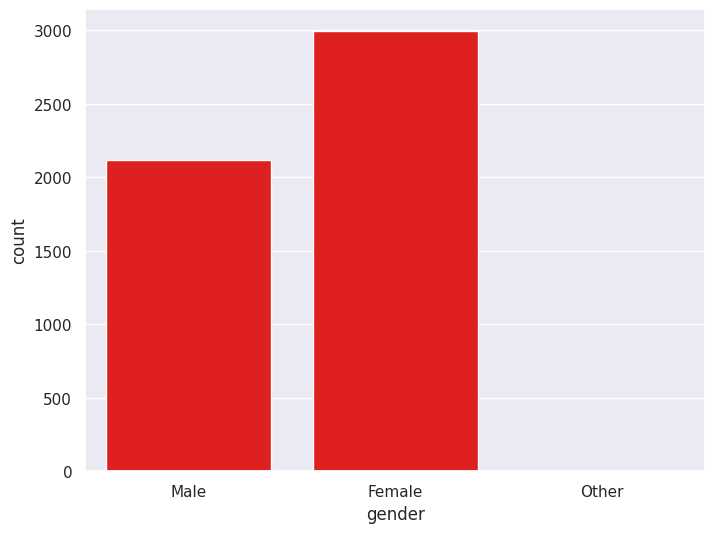

In [118]:
sns.set(rc={'figure.figsize':(8,6)})
ax=sns.countplot(data=data,x='gender',color='red')
plt.show()



> Above, you can see the Females present in our dataset is higher than males.



**Count Plot-Work_type**

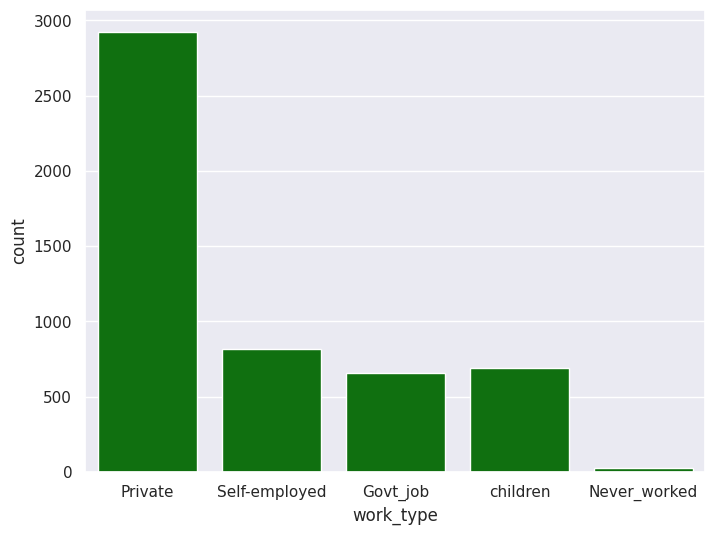

In [119]:
sns.set(rc={'figure.figsize':(8,6)})
ax=sns.countplot(data=data,x='work_type',color='green')
plt.show()



> It is evident that a lot of people works in Private sector.



**Count Plot-Residence Type**

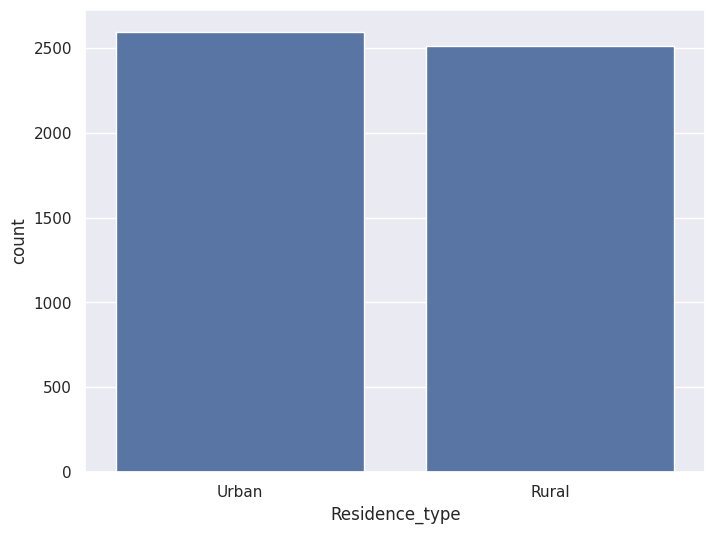

In [120]:
sns.set(rc={'figure.figsize':(8,6)})
ax=sns.countplot(data=data,x='Residence_type')
plt.show()



> The counts for Urban and Rural categories are nearly the same, indicating that the dataset is balanced in terms of residence type



**Pie-Chart - Smoking Status**

In [121]:
fig=ex.pie(data,names='smoking_status')
fig.update_layout(title='Proportion Of Different Smoking Categories Among Stroke Population')
fig.show()



> A lot of people never smoked in their life. But, we also don't know the exact status of Unknowns in our dataset.



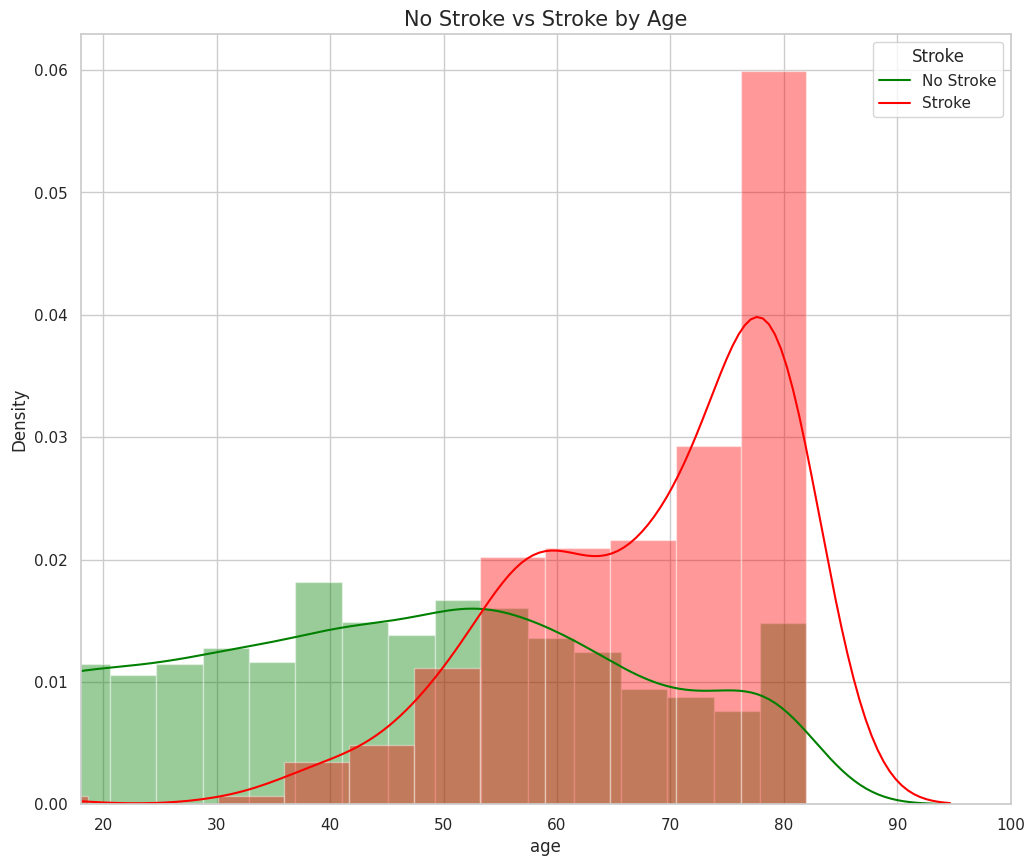

In [123]:
plt.figure(figsize=(12, 10))
sns.distplot(data[data['stroke'] == 0]["age"], color='green') # No Stroke is green
sns.distplot(data[data['stroke'] == 1]["age"], color='red') # Stroke is Red
plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.xlim([18,100])
plt.show()



>  The distribution for the "No Stroke" group appears more right-skewed, while the "Stroke" group has a prominent peak, suggesting a higher concentration of stroke cases at specific older ages.




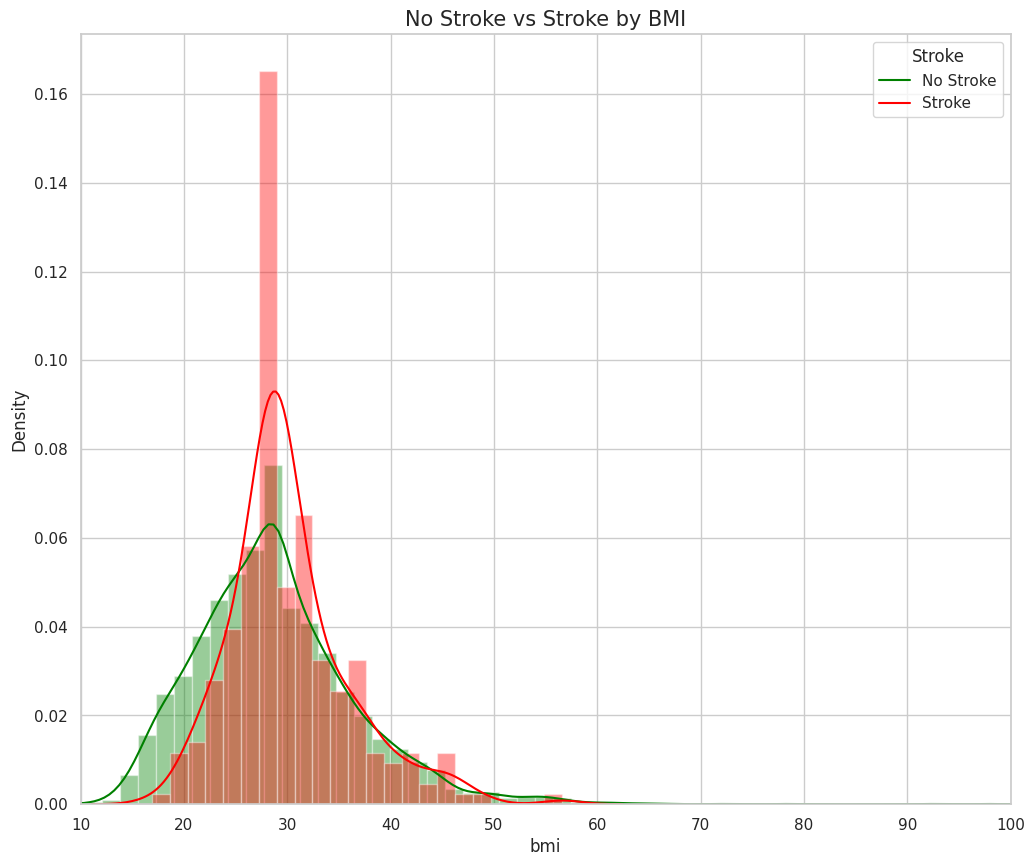

In [124]:
plt.figure(figsize=(12,10))
sns.distplot(data[data['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["bmi"], color='red') # Stroke - Red
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()




> Both "Stroke" and "No Stroke" groups have a relatively similar distribution pattern, with most individuals having a BMI between 20 and 35. However, the "Stroke" group shows a slightly higher density around the peak, indicating a clustering of stroke cases in this BMI range.




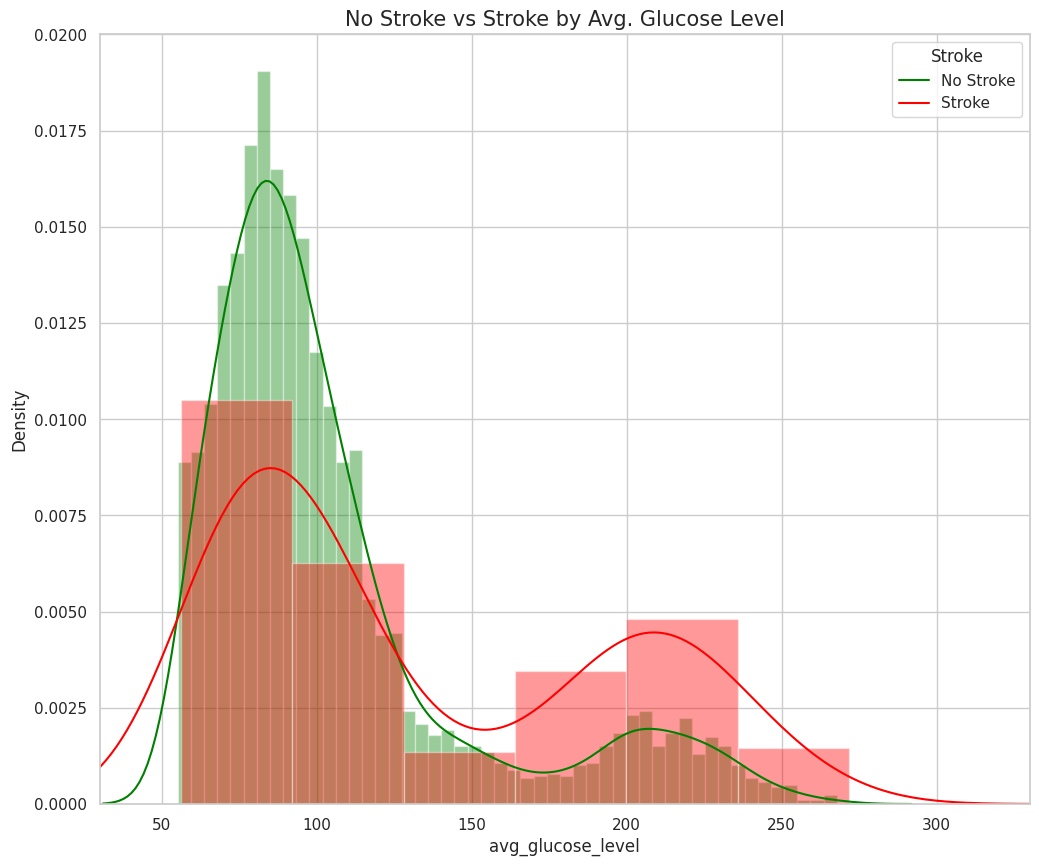

In [125]:

plt.figure(figsize=(12,10))

sns.distplot(data[data['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.xlim([30,330])
plt.show()




>1.The red curve, representing individuals who experienced a stroke, has a noticeable density increase around glucose levels of 150 and above, indicating that higher glucose levels are more associated with stroke cases.

> 2.The green curve, representing the "No Stroke" group, peaks around an average glucose level of 80-90. This suggests that individuals without strokes tend to have lower average glucose levels.





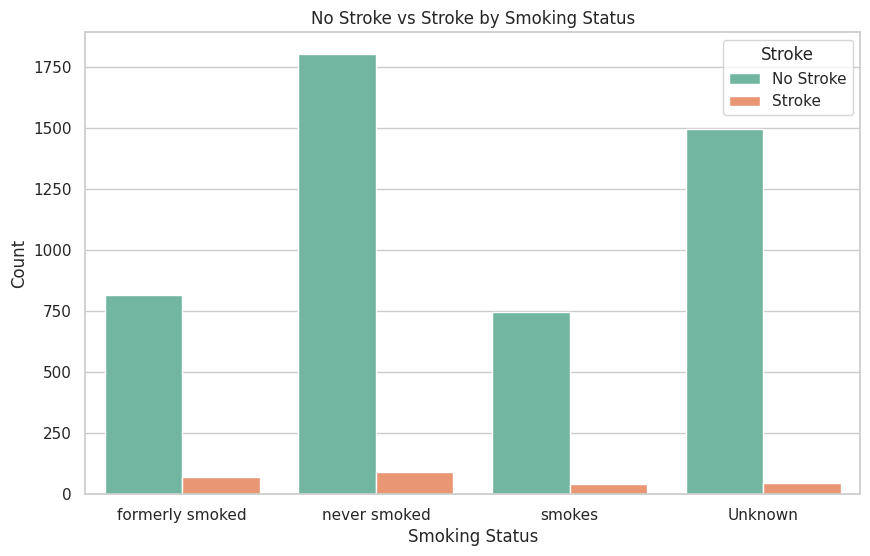

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for smoking_status, with separate bars for stroke vs. no stroke
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='smoking_status', hue='stroke', palette='Set2')

# Add title and labels
plt.title('No Stroke vs Stroke by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()




> We can observe that smoking might have some association with stroke, the impact seems limited here given the dataset's small number of stroke cases relative to smoking status.





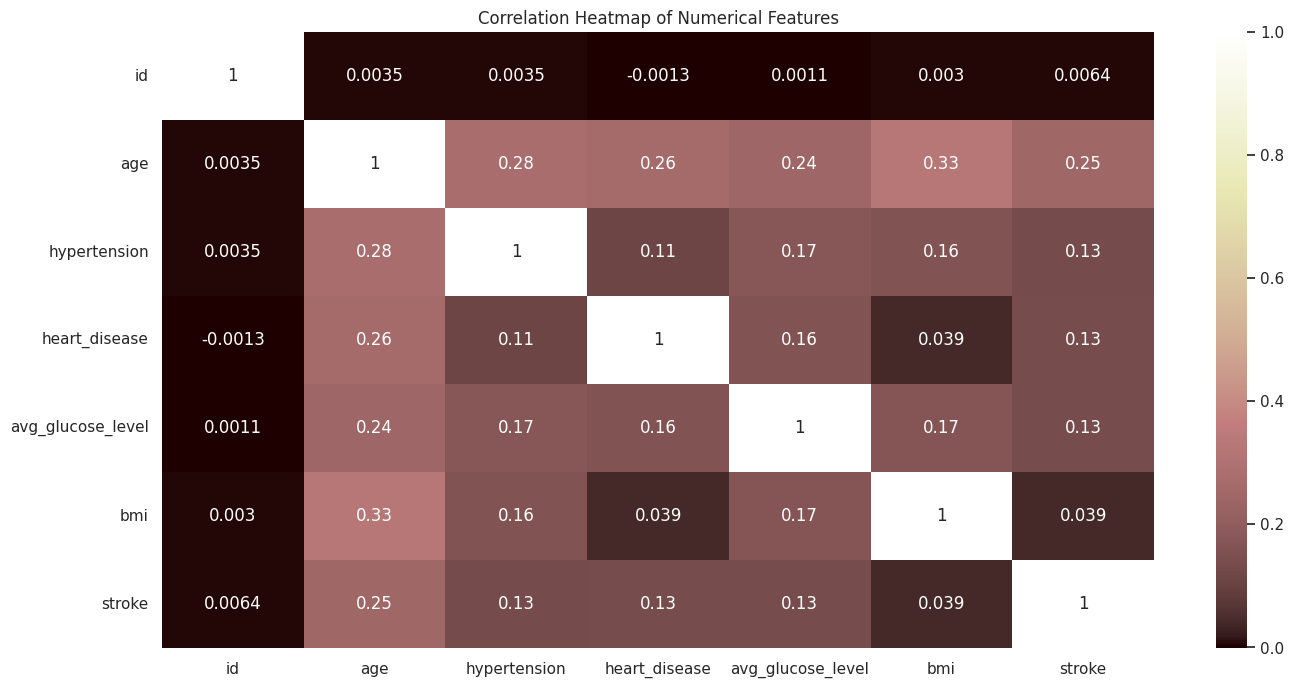

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap="pink")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()




>1. Most of the variables have low correlation values, meaning that there isn’t a strong linear relationship between most pairs of variables in this dataset.
2. The strongest correlation observed is between age and BMI (0.33), indicating a moderate positive relationship. As age increases, BMI tends to increase slightly as well.
3. Stroke has low positive correlations with hypertension, heart disease, average glucose level, and BMI, but these correlations are weak. This suggests that while these factors may have a minor association with stroke, they are not strongly predictive on their own.




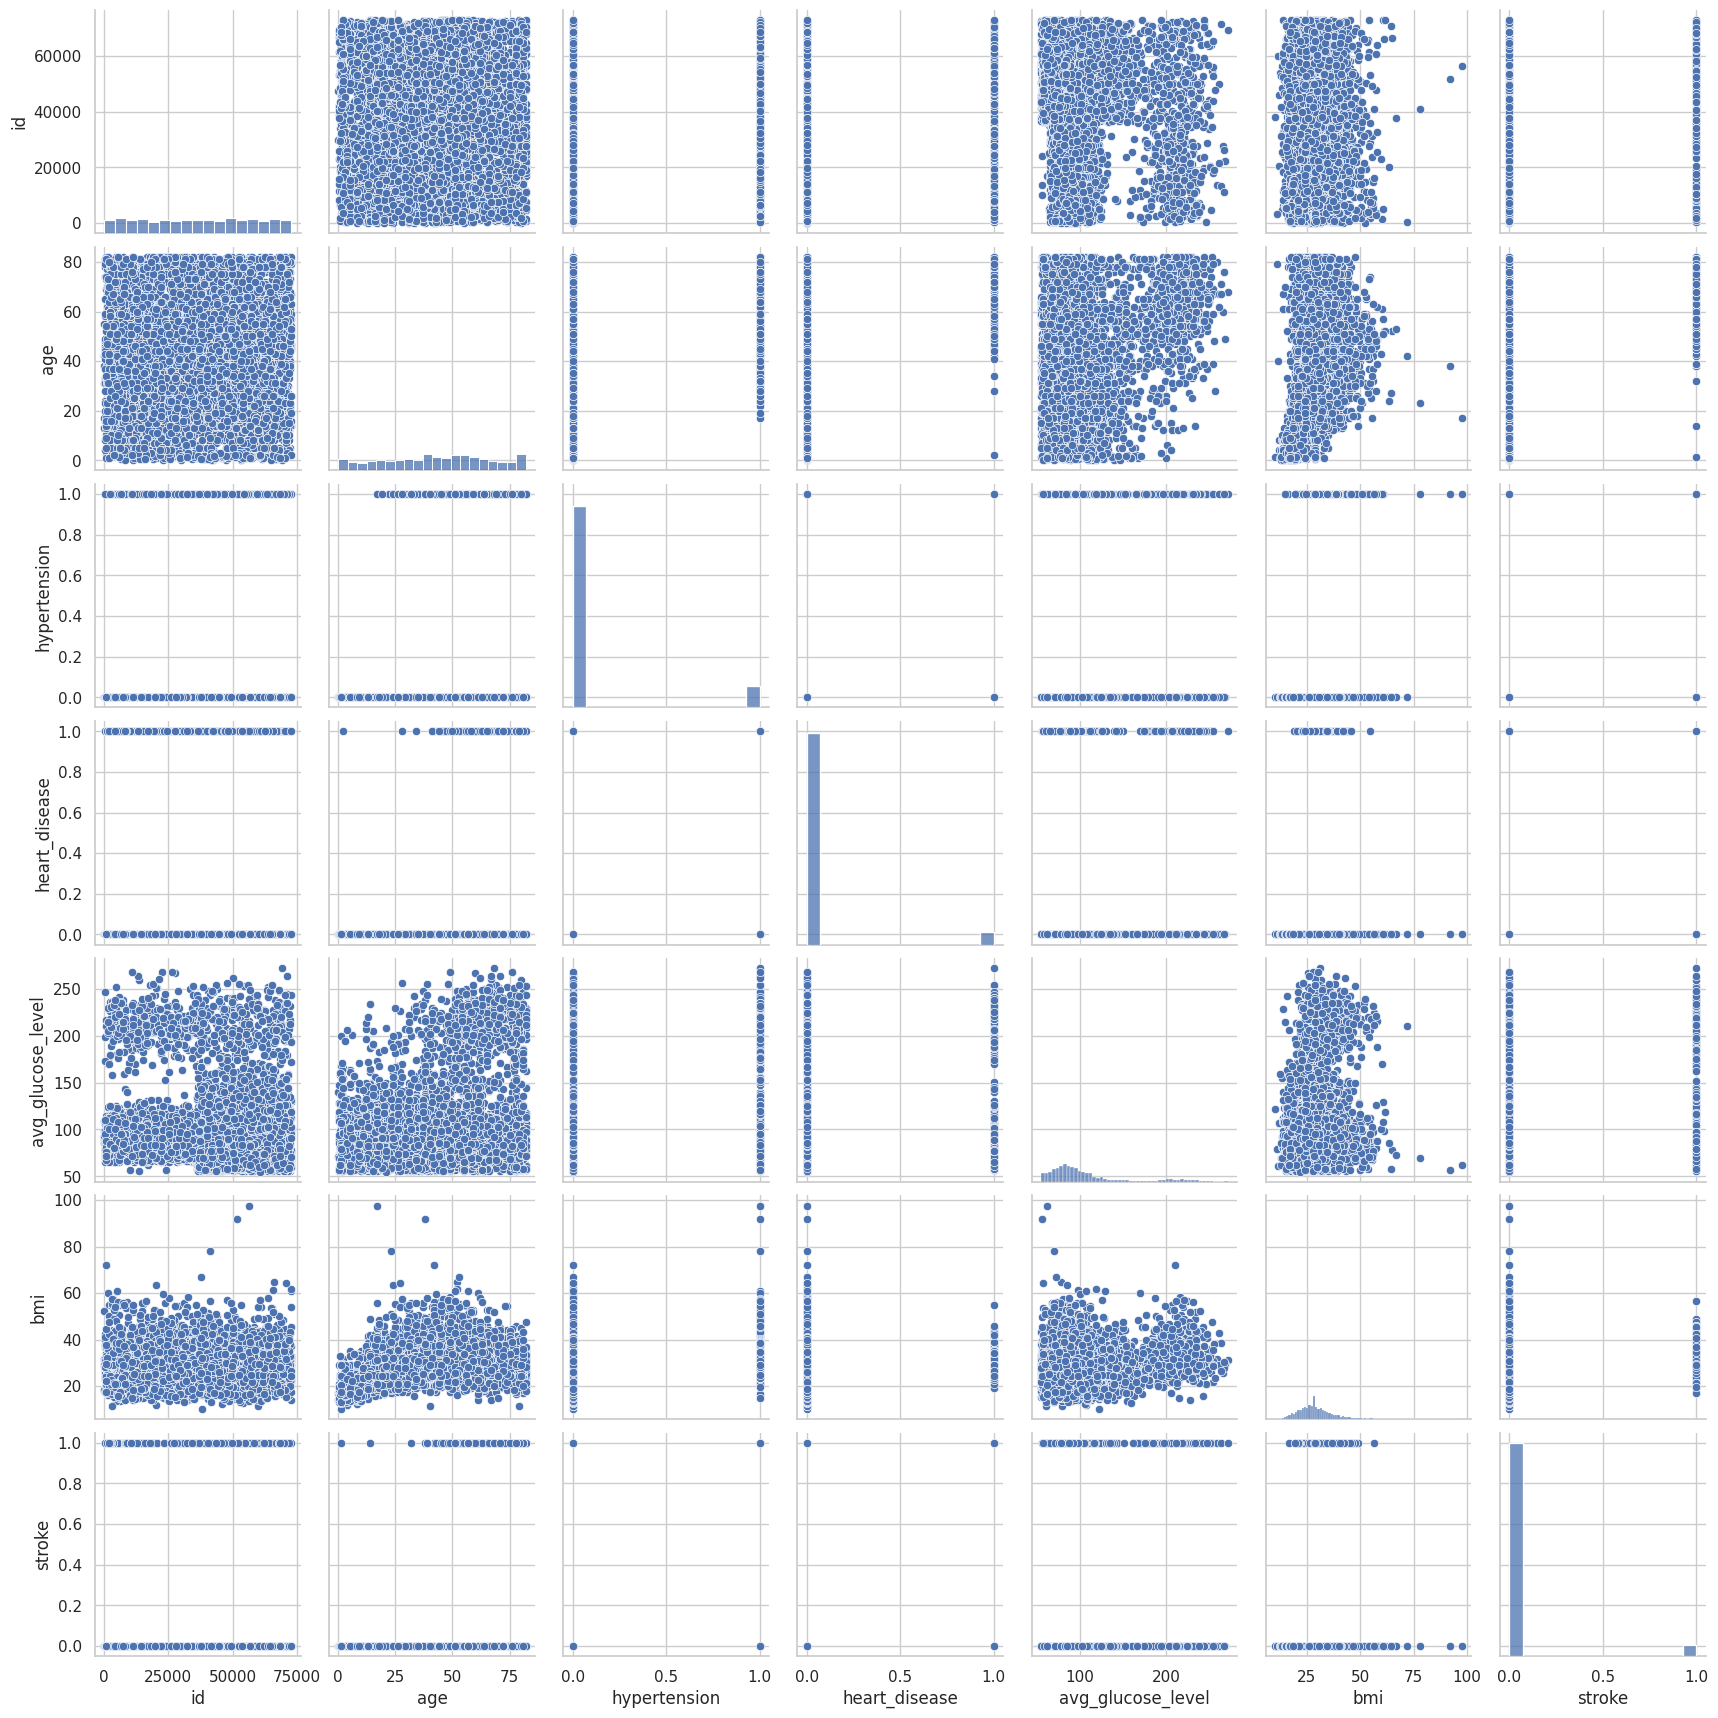

In [128]:
sns.pairplot(data)

**Observations:**




 **1.Age vs. Stroke:** There is a noticeable pattern where strokes are more common in older individuals.

**2.Average Glucose Level vs. Stroke:** Higher average glucose levels appear to correlate with a higher occurrence of strokes.

**3.BMI vs. Stroke:** it shows that the density of overweight people who suffered a stroke is more

**4.Age and Heart Disease:** Older individuals are more likely to have heart disease, as shown by the distribution in the plot between age and heart_disease.



---






# **(6) Data Encoding**

Data encoding is changing raw data into a binary format that an algorithm can read and interpret.

In [129]:
# Convert Residence_type to binary encoding
data['Residence_type'] = data['Residence_type'].map({'Rural': 0, 'Urban': 1})


In [130]:
# Convert ever_married to binary encoding: 1 for 'Yes', 0 for 'No'
data['ever_married'] = data['ever_married'].map({'Yes': 1, 'No': 0})


In [131]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])


In [132]:
# Convert work_type to multiple columns using one-hot encoding
work_type_dummies = pd.get_dummies(data['work_type'], prefix='work_type')
data = pd.concat([data, work_type_dummies], axis=1)


In [133]:
# Convert smoking_status to multiple columns using one-hot encoding
smoking_status_dummies = pd.get_dummies(data['smoking_status'], prefix='smoking_status')
data = pd.concat([data, smoking_status_dummies], axis=1)


In [134]:
data.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,Private,1,228.69,36.600000,...,1,False,False,True,False,False,False,True,False,False
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,...,1,False,False,False,True,False,False,False,True,False
2,31112,1,80.0,0,1,1,Private,0,105.92,32.500000,...,1,False,False,True,False,False,False,False,True,False




> The data is encoded



**Dropping the Orginal Columns**

In [135]:
#Drop Original Columns and Save Encoded Dataset
# Create new dataset for model
model_data = data.drop(['Residence_type', 'work_type', 'smoking_status'], axis=1)

# Display the new dataset
model_data.head()


,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,228.69,36.600000,1,False,False,True,False,False,False,True,False,False
1,51676,0,61.0,0,0,1,202.21,28.893237,1,False,False,False,True,False,False,False,True,False
2,31112,1,80.0,0,1,1,105.92,32.500000,1,False,False,True,False,False,False,False,True,False
3,60182,0,49.0,0,0,1,171.23,34.400000,1,False,False,True,False,False,False,False,False,True
4,1665,0,79.0,1,0,1,174.12,24.000000,1,False,False,False,True,False,False,False,True,False


We can see that  Original Columns are dropped and Encoded columns are saved in new Dataset



---



# **(7) Splitting the Dataset into Training and Testing**

In [136]:
X = model_data.drop(columns=['id', 'stroke'])  #Contains all features for prediction, excluding id (irrelevant) and stroke (target)
y = model_data['stroke']    # Contains the stroke column, which is the prediction target.
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)




> *   The dataset has been successfully split into training and testing sets, with 70% of the data allocated for training and 30% for testing.
*   The training set will be used to train the machine learning model to learn patterns and relationships in the data.
The testing set will be used to evaluate the model's performance on unseen data, ensuring its ability to generalize
*   A fixed random_state value (42) ensures that the split is consistent and reproducible across different runs.






In [137]:
X

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.600000,False,False,True,False,False,False,True,False,False
1,0,61.0,0,0,1,202.21,28.893237,False,False,False,True,False,False,False,True,False
2,1,80.0,0,1,1,105.92,32.500000,False,False,True,False,False,False,False,True,False
3,0,49.0,0,0,1,171.23,34.400000,False,False,True,False,False,False,False,False,True
4,0,79.0,1,0,1,174.12,24.000000,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,83.75,28.893237,False,False,True,False,False,False,False,True,False
5106,0,81.0,0,0,1,125.20,40.000000,False,False,False,True,False,False,False,True,False
5107,0,35.0,0,0,1,82.99,30.600000,False,False,False,True,False,False,False,True,False
5108,1,51.0,0,0,1,166.29,25.600000,False,False,True,False,False,False,True,False,False


In [138]:
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0




> We can see that train data is split from test data i.e stroke





In [139]:
X_train.shape,y_train.shape

((3577, 16), (3577,))

In [140]:
X_test.shape,y_test.shape

((1533, 16), (1533,))



---



# **(8) Model Training**


>
1.   Linear Regression
2.   Lasso Regression
3.   Ridge Regression
4.   Logistic Regression
5.   RandomForest Classifier

**1.Linear Regression**

In [141]:
#Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
accuracy_linear=linear_model.score(X_test, y_test)
rmse_linear
print('RMSE: ',rmse_linear)
print('Accuracy: ',accuracy_linear)

RMSE:  0.21617929398494673
Accuracy:  0.08742954650804591




> Linear Regression is unsuitable for this binary classification task, as it predicts continuous values and yields a low accuracy of 8.33%, indicating poor performance. The dataset's class imbalance further affects the model's ability to predict the minority class effectively as the majority of patients do not experience a stroke (label 0), while only a small proportion experience a stroke (label 1).



**2.Lasso Regression**

In [142]:
#Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
accuracy_lasso=lasso_model.score(X_test, y_test)
rmse_lasso
print('RMSE: ',rmse_lasso)
print('Accuracy: ',accuracy_lasso)

RMSE:  0.2247501761966168
Accuracy:  0.0136335386699169




> The Lasso Regression model performs poorly with an accuracy of only 1.54% and an RMSE of 0.2245, indicating significant underperformance.


**3.Ridge Regression**

In [143]:
# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
accuracy_ridge=ridge_model.score(X_test, y_test)
print('RMSE: ',rmse_ridge)
print('Accuracy: ',accuracy_ridge)

RMSE:  0.21617691468548134
Accuracy:  0.08744963415292073




> The Ridge Regression model achieves an accuracy of only 8.33%, indicating poor classification performance. The RMSE of 0.2167 is not meaningful for this binary classification task, as RMSE is typically used for regression problems.



**4.Logistic Regression**

In [144]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
rmse_logistic = np.sqrt(mean_squared_error(y_test, y_pred_logistic))
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print('RMSE: ',rmse_logistic)
print('Accuracy: ',accuracy_logistic)


RMSE:  0.23268477566685863
Accuracy:  0.9458577951728636




> The Logistic Regression model achieves a high accuracy of 94.59%, indicating good overall prediction performance.



**5.Random Forest Classifier**

In [145]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=500, n_jobs=-1, criterion='entropy')

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
# Calculate Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy: ", accuracy_rf)
print("RMSE: ",rmse_rf)

Random Forest Accuracy:  0.9445531637312459
RMSE:  0.23547151901823302




> The Random Forest Classifier achieved an accuracy of 94.39%, which indicates a strong model performance. This high accuracy suggests that the model is able to effectively distinguish between the classes, even with imbalanced data.






**Observations on Accuracy:**

>

1.   Linear Regression, Ridge Regression, and Lasso Regression have very low accuracy scores (0.08643047401826087, 0.0864284967335942, and 0.008134371493884487, respectively), suggesting that they are not suitable for classification tasks.
2.   Logistic Regression has the highest accuracy ( 0.9458577951728636) in comparioson with RandomForestClassifier(0.943900848010437) implying that it classifies the data points correctly with the highest probability.










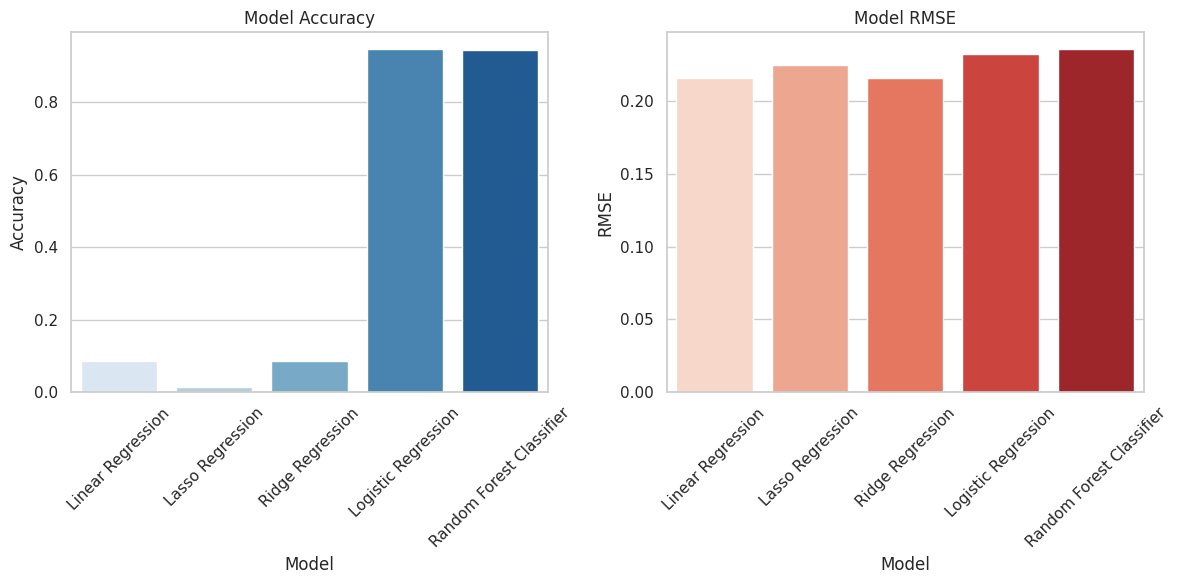

In [146]:
# Plot the metrics
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Logistic Regression','Random Forest Classifier']
accuracies = [accuracy_linear, accuracy_lasso, accuracy_ridge, accuracy_logistic,accuracy_rf]
rmses = [rmse_linear, rmse_lasso, rmse_ridge, rmse_logistic,rmse_rf]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Accuracy
sns.barplot(x=models, y=accuracies, ax=axs[0], palette='Blues')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticklabels(models, rotation=45)

# Plot RMSE
sns.barplot(x=models, y=rmses, ax=axs[1], palette='Reds')
axs[1].set_title('Model RMSE')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('RMSE')
axs[1].set_xticklabels(models, rotation=45)

plt.tight_layout()
plt.show()

**Obervations:**

**Model Accuracy:**

> *   Logistic Regression has the highest accuracy, with a value close to 0.9. This indicates that it has the highest probability of classifying data points correctly.
* RandomForest Classifier has next highest accuracy close to 0.9 after logistic Regression
*   Linear Regression has the lowest accuracy, with a value close to 0.0. This suggests that it is not suitable for classification tasks.
*   Ridge Regression and Lasso Regression have moderate accuracy, with values around 0.1 and 0.2, respectively.

**Model RMSE (Root Mean Squared Error):**

> *   Logistic Regression has the highest RMSE, indicating that it has the largest prediction errors on average. This is expected, as logistic regression is not designed for regression tasks.
*   Linear Regression has the lowest RMSE, suggesting that it has the smallest prediction errors on average.
*  Ridge Regression and Lasso Regression have similar RMSE values, indicating that they have comparable prediction errors.



---



# **(9) Precision,Recall,F1 Score,Accuracy Score**

**Addressing Class Imbalance**


Class Distribution (in %):
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


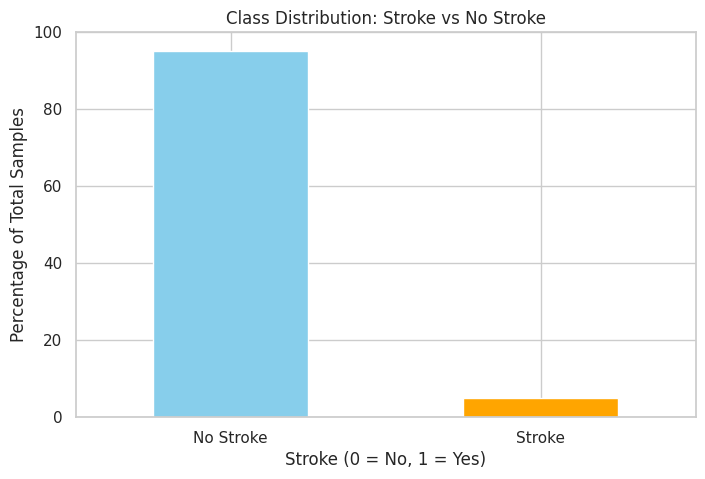

In [147]:
class_distribution = y.value_counts(normalize=True) * 100
print("\nClass Distribution (in %):")
print(class_distribution)
# Plot class distribution
plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution: Stroke vs No Stroke")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Percentage of Total Samples")
plt.xticks(ticks=[0, 1], labels=["No Stroke", "Stroke"], rotation=0)
plt.ylim(0, 100)
plt.show()



> The chart shows a highly imbalanced dataset where most samples belong to the "No Stroke" category, while "Stroke" cases are rare. This imbalance can cause issues for machine learning models, leading to poor performance in detecting strokes so we can set an appropriate decision threshold. The default threshold of 0.5 may not work well with imbalanced datasets.



In [148]:

#For imbalanced datasets, the default threshold may not work well (e.g:it may miss many positive cases), so you need probabilities to tune the threshold.
# Generate probabilities i.e  extracts the probabilities for the positive class (stroke = 1) for each sample.
y_pred_probabilities = logistic_model.predict_proba(X_test)[:, 1]
# Adjust threshold
threshold = 0.3
y_pred_adjusted = (y_pred_probabilities >= threshold).astype(int)

**1.Precision:**

Precision measures the proportion of correctly predicted positive cases out of all cases predicted as positive.

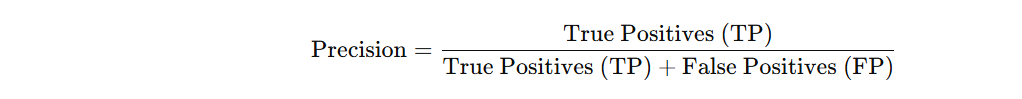

In [149]:

# Calculate precision for logistic regression
precision = precision_score(y_test, y_pred_adjusted)
print(f"Precision: {precision}")

Precision: 0.2




> * **Precision:** 0.2 – Only 20% of the positive predictions (stroke = 1) are correct, indicating a high rate of false positives


---





**2.Recall**

Recall measures the proportion of actual positive cases that are correctly identified by the model.

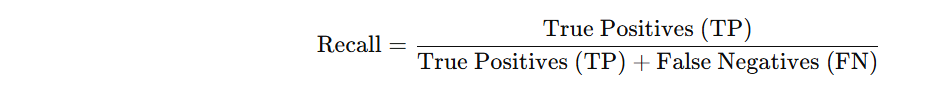

In [150]:
#Recall for logistic Regression
recall = recall_score(y_test, y_pred_adjusted)
print(f"Recall: {recall}")

Recall: 0.03614457831325301




> **Recall:** 0.0361 – The model is identifying only 3.6% of actual positive cases, which is very low, meaning it misses most of the stroke cases.



---





**3.F1-Score**

F1-score is the harmonic mean of precision and recall.It provides a single metric to balance precision and recall.

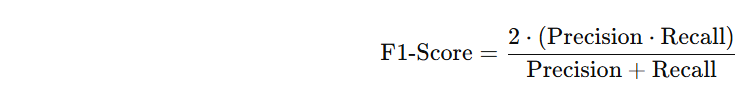

In [151]:
#f1 Score for Logistic Regression
f1 = f1_score(y_test, y_pred_adjusted)
print(f"F1 Score: {f1}")

F1 Score: 0.061224489795918366




> * **F1 Score:** 0.0612 – The F1 score is very low, suggesting a poor balance between precision and recall, heavily impacted by the extremely low recall.




---








**4.Accuracy Score**

In [152]:
#accuracy score for logistic Regression
accuracy=accuracy_score(y_test,y_pred_logistic)
print(f"Accuracy Score:{accuracy}")

Accuracy Score:0.9458577951728636




> This indicates that approximately 94% of the predictions were correct.



---





# **(10) Confusion Matrix**

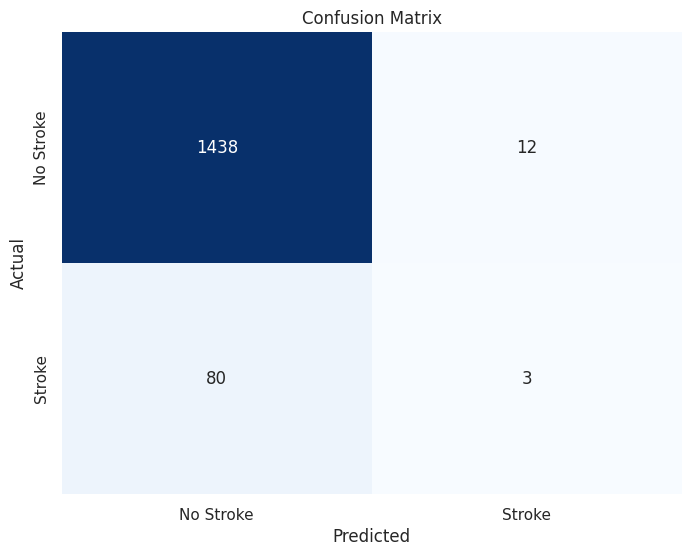

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have y_test (true labels) and y_pred_adjusted (predictions)
cm = confusion_matrix(y_test, y_pred_adjusted)

# Plotting the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




> *  True Negatives (TN): The model correctly predicted 1438 instances as "No Stroke," which means it performed well in identifying the majority class.
*   False Positives (FP): There are 12 instances where the model incorrectly predicted "Stroke" for cases that were actually "No Stroke." This is relatively low.
*   False Negatives (FN): The model missed 80 instances of "Stroke" and predicted them as "No Stroke." This is a significant number, highlighting a potential issue in identifying the minority class.
*   True Positives (TP): Only 3 instances of "Stroke" were correctly identified. This indicates a poor sensitivity (recall) for the "Stroke" class.



---










# **(11) Precision recall Curve**

The curve plots the precision (y-axis) and recall (x-axis) at various classification thresholds. It shows how well the Logistic Regression model performs in terms of precision and recall, especially for the positive class (stroke).

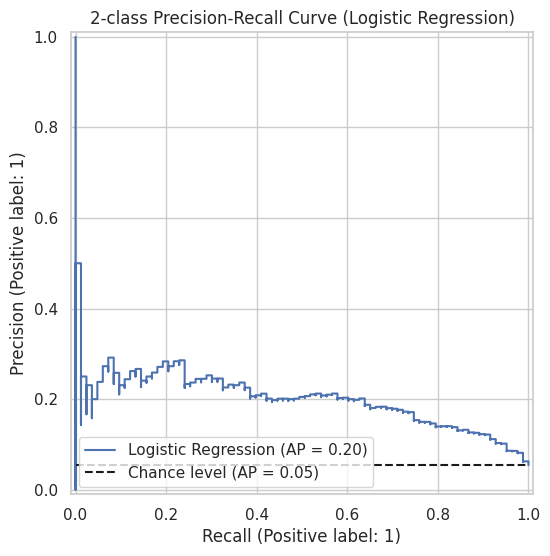

In [154]:
# Visualize Precision-Recall curve using the trained model on X_test, y_test
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    logistic_model, X_test, y_test, name="Logistic Regression", plot_chance_level=True
)

# Customize the plot title and labels
display.ax_.set_title("2-class Precision-Recall Curve (Logistic Regression)")

# Show the plot
plt.show()


**Observations:**
> *   **Model Performance:** The logistic regression model achieves an average precision (AP) of 0.20, which is slightly better than the chance level (AP = 0.05), but still indicates suboptimal performance.
*   **Precision-Recall Trade-off:** The PR curve shows that the model struggles to maintain high precision as recall increases, with precision remaining low across most recall values.
*   **Class Imbalance or Weak Predictive Power:** The curve's proximity to the baseline suggests the model may face challenges with class imbalance for predicting the positive class (label: 1).



---







# **(12) Bias Analysis of The Dataset**

**Bias in The Dataset**

**1.Class Distribution:**


*   The target variable stroke is heavily imbalanced. A majority of the samples are labeled as "No Stroke," while only a small percentage corresponds to "Stroke."
*   This imbalance biases models towards predicting the majority class, which reduces their ability to identify true stroke cases effectively.

**2.Possible Sources of Bias:**

*  Imbalance in Smoking and Health Indicators: Missing data for smoking status  could also introduce biases.
*  Representation Bias: If certain demographic groups (e.g., gender, age groups, or regions) are under-represented, the model may become skewed to perform better for females .

**Tackling the Bias**

2.Handle Class Imbalance: Resampling: Use oversampling (e.g., SMOTE) for the minority class or undersampling for the majority class.



---








